In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [33]:
ls data_1/

badminton/  baseball/   basketball/ boxing/     cricket/    football/


In [34]:
labels = ['badminton', 'baseball', 'basketball', 'boxing', 'cricket', 'football']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [35]:
train = 'data_1/'

In [36]:
batch_size = 32 
img_width = 500
img_height = 500

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

init_images = train_datagen.flow_from_directory(
      train,
      target_size=(img_width, img_height),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size)

Found 3253 images belonging to 6 classes.
Found 810 images belonging to 6 classes.
Found 4063 images belonging to 6 classes.


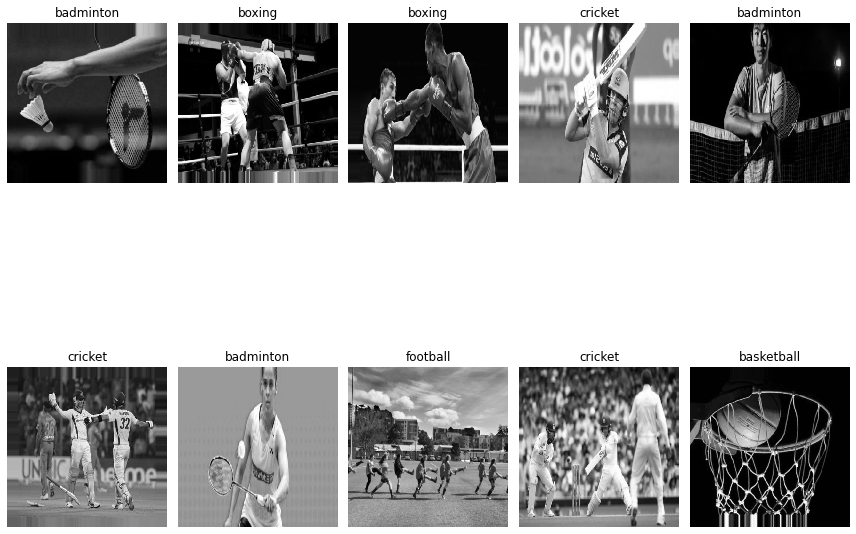

In [38]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in init_images:
        image = X_batch[0]        
        dic = {0:'badminton', 1:'baseball', 2:'basketball', 3:'boxing', 4:'cricket', 5:'football'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        #plt.imshow(images[i].numpy().astype("uint8"))
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [22]:
import os

num_skipped = 0
for folder_name in (['badminton', 'baseball', 'basketball', 'boxing', 'cricket', 'football']):
    folder_path = os.path.join("data_1", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [39]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 
# Imports that will allow a CNN architecture to be created.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

my_init1 = initializers.TruncatedNormal(mean = 0.0, stddev = 0.05, seed = None)

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))#, kernel_initializer = my_init))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 1)

<ipython-input-29-b9a9c390fc62>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


101/101 [==============================] - 264s 3s/step - loss: -20170758.0000 - accuracy: 0.1701 - val_loss: -134572528.0000 - val_accuracy: 0.1713


In [30]:
test_a = model.evaluate(validation_generator)
print('The testing accuracy is :',test_a[1]*100, '%')

26/26 [==============================] - 41s 2s/step - loss: -135110256.0000 - accuracy: 0.1704
The testing accuracy is : 17.037037014961243 %


In [56]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# image_gen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# test_data_gen = ImageDataGenerator(rescale = 1./255)

In [60]:
# image_size = (500, 500)
# batch_size = 32

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "data_1",
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "data_1",
#     validation_split=0.2,
#     subset="validation",
#     seed=1337,
#     image_size=image_size,
#     batch_size=batch_size,
# )

Found 1815 files belonging to 3 classes.
Using 1452 files for training.
Found 1815 files belonging to 3 classes.
Using 363 files for validation.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [61]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 
# Imports that will allow a CNN architecture to be created.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

my_init1 = initializers.TruncatedNormal(mean = 0.0, stddev = 0.05, seed = None)

In [27]:
# my_init = initializers.Zeros()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(500, 500, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))#, kernel_initializer = my_init))
model.add(Dense(activation = 'relu', units = 64, kernel_initializer = my_init1))
model.add(Dense(activation = 'relu', units = 32))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1984032)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               253956224 
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                      

In [76]:
model1 = model.fit(train_ds,
                         steps_per_epoch = 46,
                         epochs = 2,
                         validation_data = val_ds,
                         validation_steps = 624)

Epoch 1/2
46/46 [==============================] - 91s 2s/step - loss: -10259911.0000 - accuracy: 0.3657 - val_loss: -23204120.0000 - val_accuracy: 0.3499
Epoch 2/2
46/46 [==============================] - 84s 2s/step - loss: -114855488.0000 - accuracy: 0.3478


In [128]:
test_a = model.evaluate(validation_generator)
print('The testing accuracy is :',test_a[1]*100, '%')

12/12 [==============================] - 18s 1s/step - loss: -788.4544 - accuracy: 0.4917
The testing accuracy is : 49.17127192020416 %


In [129]:
img = keras.preprocessing.image.load_img(
    "data_1/basketball/00000021.JPG", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "There is a %.2f percent chance this picture has to do with Basketball."
    % (100 * (1 - score)))

There is a 0.00 percent chance this picture has to do with Basketball.


In [130]:
img = keras.preprocessing.image.load_img(
    "data_1/basketball/00000012.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "There is a %.2f percent chance this picture has to do with Basketball."
    % (100 * (1 - score)))

There is a 0.00 percent chance this picture has to do with Basketball.
